- What is probability that in a class of 28 students, two or more people can have birthday on the same day?

In [ ]:
s = c(1:365)
birthdays = function(){
  dates = numeric(28)
  for (j in c(1:28)){
    dates[j] = sample(s, size = 1, replace = TRUE)}
  return(dates)}

nsimulations = 100000
simulatedData = replicate(nsimulations, birthdays())

checkEvent = function(data){
  return(any(duplicated(data)))}

mean(apply(simulatedData, 2, checkEvent))*100

[1] 65.227

In [ ]:
p = 1
for (j in c(1:28)){
    p = p * (365 - (j-1)) / 365
  }

p_shared_birthday = 1 - p
p_shared_birthday*100

[1] 65.44615

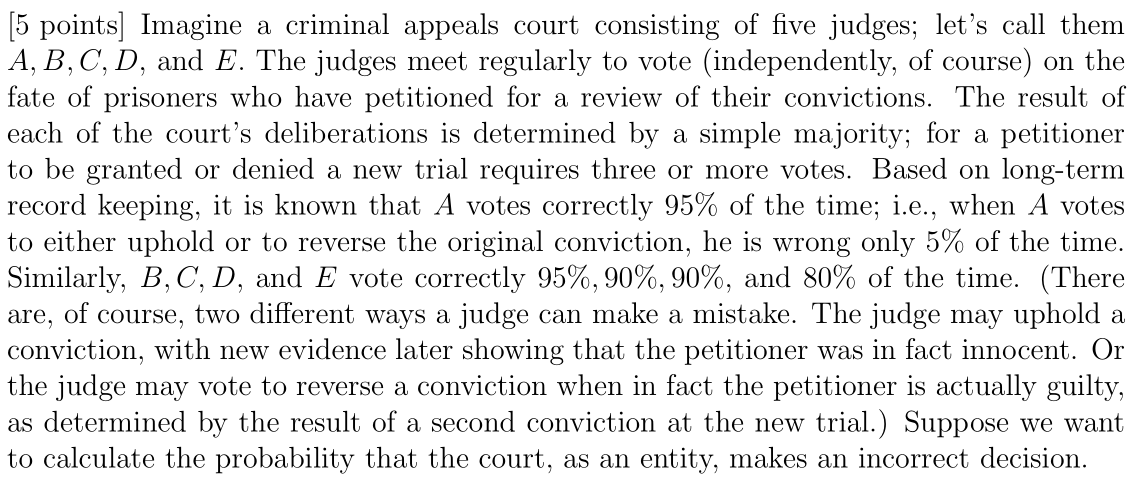

In [ ]:
# Sampling space
s = c(1, 0)

# Corresponding probabilities
p = matrix(nrow = 5, ncol = 2, c(0.95, 0.95, 0.9, 0.9, 0.8, 0.05, 0.05, 0.1, 0.1, 0.2))

# Simulate the random experiment of the 5 judges making decisions
judgeResult = function(){
  result = numeric(5)
  for (j in c(1:5)){
    result[j] = sample(s, size = 1, replace = TRUE, prob = p[j, ])
  }
  return(result)
}

nsimulations = 100000
simulatedData = replicate(nsimulations, judgeResult())

# Function to check if the majority decision is incorrect
# which is the same as the court making an incorrect decision
checkEvent = function(data){
  return(sum(data) < 3)
}

# Probability that the court makes an incorrect decision
mean(apply(simulatedData, 2, checkEvent))